# Ejercicio

Utilizando dos redes pre-entrenadas `VGG19` y `Resnet50`, implementar una arquitectura para clasificar el dataset de `CIFAR10` y comparar resultados.

>NOTE: No realizar `fine tuning`

## VGG19

In [9]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import imagenet_utils
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR10
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data() #TODO
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

#One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!
trainX = imagenet_utils.preprocess_input(trainX) #TODO
testX = imagenet_utils.preprocess_input(testX) #TODO

[INFO]: Loading CIFAR-10 data...


In [10]:
from tensorflow.keras.applications import VGG19

base_model =VGG19(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=(32,32,3))
base_model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [11]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
#TODO
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(10, activation='softmax'))

pre_trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 20158282 (76.90 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [12]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

BASE_FOLDER = './data/'

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", #TODO
                          optimizer=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                          metrics=["accuracy"])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = pre_trained_model.fit(trainX, trainY, batch_size=128, epochs=20, validation_split=0.2)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras

pre_trained_model.save(BASE_FOLDER+"deepCNN_VGG19_CIFAR10_pretrained.h5") #(X)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 14s 38ms/step - loss: 3.6102 - accuracy: 0.4928 - val_loss: 2.0689 - val_accuracy: 0.5431
Epoch 2/20
313/313 [==============================] - 9s 29ms/step - loss: 1.5759 - accuracy: 0.5939 - val_loss: 1.5969 - val_accuracy: 0.5767
Epoch 3/20
313/313 [==============================] - 8s 25ms/step - loss: 1.1361 - accuracy: 0.6533 - val_loss: 1.4215 - val_accuracy: 0.5971
Epoch 4/20
313/313 [==============================] - 8s 25ms/step - loss: 0.9136 - accuracy: 0.6997 - val_loss: 1.3497 - val_accuracy: 0.6066
Epoch 5/20
313/313 [==============================] - 8s 25ms/step - loss: 0.7819 - accuracy: 0.7361 - val_loss: 1.3144 - val_accuracy: 0.6148
Epoch 6/20
313/313 [==============================] - 8s 25ms/step - loss: 0.6816 - accuracy: 0.7677 - val_loss: 1.3135 - val_accuracy: 0.6123
Epoch 7/20
313/313 [==============================] - 8s 25ms/step - loss: 0.608

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

       Avión       0.68      0.63      0.66      1000
   Automóvil       0.69      0.74      0.71      1000
      Pájaro       0.50      0.57      0.54      1000
        Gato       0.46      0.45      0.45      1000
      Ciervo       0.56      0.49      0.52      1000
       Perro       0.55      0.55      0.55      1000
        Rana       0.64      0.66      0.65      1000
     Caballo       0.67      0.66      0.67      1000
       Barco       0.70      0.72      0.71      1000
      Camión       0.69      0.67      0.68      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



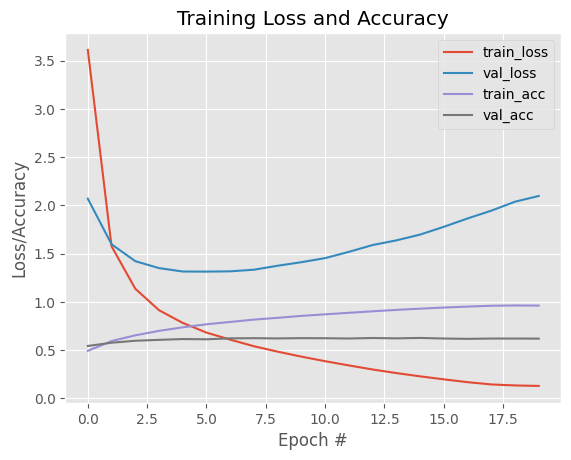

In [14]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)

predictions = pre_trained_model.predict(testX, batch_size=128) #TODO
# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Resnet50

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import imagenet_utils
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR10
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()  #TODO
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

#One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!
trainX = imagenet_utils.preprocess_input(trainX) #TODO
testX = imagenet_utils.preprocess_input(testX) #TODO

[INFO]: Loading CIFAR-10 data...


In [5]:
from tensorflow.keras.applications import ResNet50


base_model =ResNet50(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=(32,32,3))
base_model.summary() #TODO


94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                      

In [6]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(10, activation='softmax'))
#TODO

pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24114826 (91.99 MB)
Trainable params: 527114 (2.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

BASE_FOLDER = './data/'

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", #TODO
                          optimizer=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                          metrics=["accuracy"])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = pre_trained_model.fit(trainX, trainY, batch_size=128, epochs=20, validation_split=0.2)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive')
# Almacenamos el modelo empleando la función mdoel.save de Keras

pre_trained_model.save(BASE_FOLDER+"deepCNN_RESNET50_CIFAR10_pretrained.h5") #(X)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/20
313/313 [==============================] - 21s 33ms/step - loss: 1.2848 - accuracy: 0.5825 - val_loss: 1.0515 - val_accuracy: 0.6325
Epoch 2/20
313/313 [==============================] - 7s 22ms/step - loss: 0.8721 - accuracy: 0.6980 - val_loss: 1.0231 - val_accuracy: 0.6522
Epoch 3/20
313/313 [==============================] - 7s 22ms/step - loss: 0.7113 - accuracy: 0.7524 - val_loss: 0.9967 - val_accuracy: 0.6612
Epoch 4/20
313/313 [==============================] - 6s 21ms/step - loss: 0.5766 - accuracy: 0.8018 - val_loss: 1.0316 - val_accuracy: 0.6590
Epoch 5/20
313/313 [==============================] - 7s 22ms/step - loss: 0.4577 - accuracy: 0.8465 - val_loss: 1.0771 - val_accuracy: 0.6609
Epoch 6/20
313/313 [==============================] - 7s 21ms/step - loss: 0.3580 - accuracy: 0.8844 - val_loss: 1.1377 - val_accuracy: 0.6535
Epoch 7/20
313/313 [==============================] - 7s 22ms/step - loss: 0.266

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 2s 16ms/step
              precision    recall  f1-score   support

       Avión       0.68      0.66      0.67      1000
   Automóvil       0.76      0.58      0.66      1000
      Pájaro       0.60      0.48      0.53      1000
        Gato       0.41      0.54      0.46      1000
      Ciervo       0.55      0.62      0.58      1000
       Perro       0.57      0.46      0.51      1000
        Rana       0.69      0.67      0.68      1000
     Caballo       0.68      0.65      0.66      1000
       Barco       0.72      0.75      0.73      1000
      Camión       0.62      0.76      0.68      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



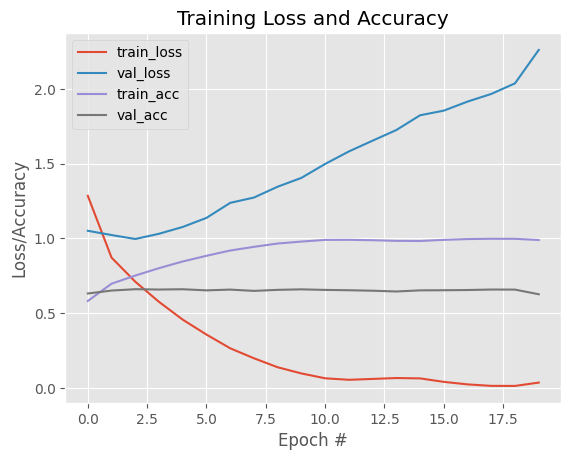

In [8]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(testX, batch_size=128)
# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()